This Python Notebook was made by Jake Hagerson with the assistant of AI tools. I was an intern in the summer of 2025.

In [ ]:
#Imports
import datetime
import os
from math import ceil

import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from ipywidgets import interact, widgets

In [ ]:
#Here is a generic color plaette for the graphs which you can change
#at your disgression
color_palette = [
    'dodgerblue',
    'mediumseagreen',
    'goldenrod',
    'indianred',
    'slateblue',
    'tomato',
    'orchid',
    'darkcyan',
    'rosybrown',
    'steelblue',
    'coral',
    'darkorange',
    'limegreen',
    'sienna',
    'mediumvioletred',
    'peru',
    'teal',
    'cadetblue',
    'palevioletred',
    'darkkhaki'
]


In [ ]:
# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = r"C:\Users\jakeh\OneDrive\Desktop\Jake AJA Copy Folder\Datalog\20250625_S041_Ta_500W_815s_600C_25-Jun-25_ 2_03_23 PM.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, skiprows= 1)

# Will show what the dataframe looks like
print(df.head())
print(df.shape)

There are 74 Different Parameters that the AJA sputterer stores, most of which are useless.

In [ ]:
#Here is a display of the Temperature vs. Time graph with a layer seperation


#Plot Creation
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Sub. Temp.'], label='Temperature', marker=',')
plt.plot(df['Time'], df['Sub. Temp. STPT'], label='STPT Temperature', marker=',')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()


#In order to visualize the different layers we have to find out the data ranges of these layers

#This is take the last entry from the layer column which should be the number of layers
layer_num = int(df['Layer #'].iloc[-1])

#Now we select the colors for each layer based on the number of layers
colors =[i for i in color_palette[0:layer_num]]

#Now find the ranges
def get_color_ranges() -> list:
    color_ranges = []
    current_layer = 1
    start = 0
    end = 0
    for i in range(len(df['Time'])):
        if df['Layer #'][i] > current_layer:
            color_ranges.append((df['Time'][start],df['Time'][end]))
            start = i
            end = start
            current_layer += 1
        elif i == len(df['Time']) -1:
            color_ranges.append((df['Time'][start],df['Time'][end]))
        else:
            end += 1
    return color_ranges


#Now we color the areas of the graph
color_ranges = get_color_ranges()
for i in range(len(color_ranges)):
    plt.axvspan(color_ranges[i][0], color_ranges[i][1], facecolor=colors[i], alpha=0.5, label = f"Layer {i+1}")
    plt.text(color_ranges[i][0], i*30, s = f"Layer {i+1}" )
#Because these files are so dense, we only display the 100th timestamp
plt.xticks(df['Time'][::1000])
#Show the Graph
plt.show()

Now For a Dynamic Program that will allow you to select which variables to plot

Dropdown(description='Select File:', layout=Layout(width='50%'), options=('202401010_MPS011_Al_on_Silicon_10_1…

Button(description='Load File', style=ButtonStyle())

Dropdown(description='X-axis:', options=('Date', 'Time', 'Layer #', 'Sub. Rot.', 'Sub. Rot. Speed', 'Sub. Z He…

Label(value='Display Individaul Layers:', layout=Layout(display='none'))

Checkbox(value=False, layout=Layout(display='none'))

Dropdown(description='Layer Start:', layout=Layout(display='none'), options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), v…

Dropdown(description='Layer End:', layout=Layout(display='none'), options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), val…

Dropdown(description='Y-axis:', options=('Date', 'Time', 'Layer #', 'Sub. Rot.', 'Sub. Rot. Speed', 'Sub. Z He…

Button(description='Plot', style=ButtonStyle())

Output()

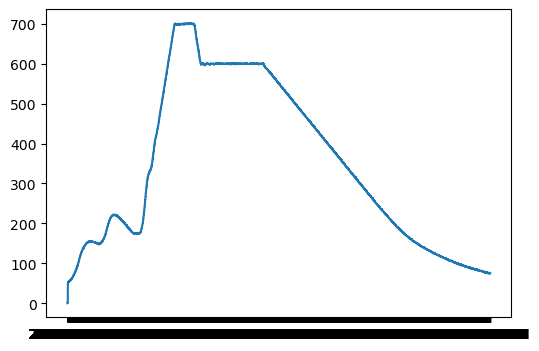

In [ ]:
#This cell can be used to plot single variables of a file



#Datalog Folder
target_folder = r"D:\Logs"

#Makes a list of all of the files
file_list = [f for f in os.listdir(target_folder) if os.path.isfile(os.path.join(target_folder, f))]

#Initialize a blank Dataframe

df = pd.read_csv(r"20250714_XRR04_S055_30C_3nm Ta_600C_97_nm_Ta_TaOx_14-Jul-25_ 4_55_14 PM.csv", skiprows=1)




#Creates a dropdown menu to select the file you want
file_dropdown = widgets.Dropdown(
    options=file_list,
    description='Select File:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

#Creates a button to load the file
load_button = widgets.Button(description='Load File')

output = widgets.Output()

#Event handler for the load button
def on_load_clicked(b):
    with output:
        output.clear_output()
        selected_file = file_dropdown.value
        file_path = os.path.join(target_folder, selected_file)
        print(f"Selected file: {selected_file}")
        
        # Optional: Read file into a DataFrame
        import pandas as pd
        df = pd.read_csv(file_path, skiprows=1)
        print("File Loaded")

        #Convert Time to datetime

        #print(df.head())




load_button.on_click(on_load_clicked)

#Event handlers for layer number
def get_layer_num() -> int:
    return int(df['Layer #'].iloc[-1])
def get_random_color_list() -> list:
    return [i for i in color_palette[0:layer_num]]

def get_layer_names() -> list:

    sample_number = file_dropdown.value.split("_")[1]

    new_target_folder = "\\".join(target_folder.split("\\")[:-1])
    file_list = [f for f in os.listdir(new_target_folder) if (os.path.isfile(os.path.join(new_target_folder, f)) and f[-3:] == "ajp")]
    name = [f for f in file_list if f.count(sample_number) == 1][0]
    line = ""
    with open(new_target_folder + "\\" + name, "r") as f:
        line = f.readline()
    my_list =line.split("\x00")
    my_list = [i.split("_", 1)[1] for i in my_list if len(i) > 3]

    return my_list

def get_layer_range() -> list:
    layer_ranges = []
    current_layer = 1
    start = 0
    end = 0
    for i in range(len(df['Time'])):
        if df['Layer #'][i] > current_layer:
            layer_ranges.append((start, end))
            #layer_ranges.append((df['Time'][start],df['Time'][end]))
            start = i
            end = start
            current_layer += 1
        elif i == len(df['Time']) -1:
            layer_ranges.append((start, end))
        else:
            end += 1 
    return layer_ranges

#Colors
new_color_palette = ['brown', 'firebrick', 'maroon']
colors =[new_color_palette[i% (len(new_color_palette))] for i in range(get_layer_num()) ]


#Initialize Buttons
x_dropdown = widgets.Dropdown(options=df.columns.tolist(), description='X-axis:')
y_dropdown = widgets.Dropdown(options=df.columns.tolist(), description='Y-axis:')
plot_button = widgets.Button(description='Plot')

layer_range_start_button = widgets.Dropdown(options = zip(get_layer_names(),range(1, 1+ get_layer_num())), value = 1, description = "Layer Start:")
layer_range_end_button = widgets.Dropdown(options = zip(get_layer_names(),range(1, 1+ get_layer_num())), value = get_layer_num(), description = "Layer End:")
layer_range_start_button.layout.display = 'none'
layer_range_end_button.layout.display = 'none'

layer_checkbox_button = widgets.Checkbox(value = False, desciption = "Show Layers:", indent = True)
layer_checkbox_button.layout.display = 'none'
checkbox_text = widgets.Label("Display Individaul Layers:", indent = True)
checkbox_text.layout.display = 'none'

relative_time_checkbox = widgets.Checkbox(value = False, description = "Relative Time:", indent = True)
relative_time_checkbox.layout.display = 'none'
relative_time_text = widgets.Label("Use Relative Time", indent = True)
relative_time_text.layout.display = 'none'

use_layer_bool = False


def plot_columns(x_col, y_col, start = None, end = None):
    #print((df[x_col], df[y_col]))


    #print(df.head())
    plt.figure(figsize=(6, 4))
    if layer_checkbox_button.value:
        layer_ranges = get_layer_range()
        if start == end:
            start_time = layer_ranges[start-1][0]
            end_time= layer_ranges[start-1][1]
        else:
            start_time = layer_ranges[start-1][0]
            end_time= layer_ranges[end-1][1]

        column_range = int(df[y_col][start_time:end_time].max()) - int(df[y_col][start_time:end_time].min())
        spacing = int(column_range / get_layer_num())
        layer_names = get_layer_names()
        #print(df.head())n
        if relative_time_checkbox.value:
            date_time_column = pd.to_datetime(df['Time'], format='%I:%M:%S %p')
            epoch = date_time_column.iloc[0]
            relative_time_column = (date_time_column - epoch).dt.total_seconds() / 3600
            plt.plot(relative_time_column[start_time:end_time], df[y_col][start_time:end_time], marker=',')
            for i in range(start-1, end):
                plt.axvspan(relative_time_column[layer_ranges[i][0]], relative_time_column[layer_ranges[i][1]], facecolor=colors[i], alpha=0.5, label = f"Layer {i+1}")
                plt.text(relative_time_column[layer_ranges[i][0]], i*spacing, s = layer_names[i], fontsize = "x-small")
            plt.xticks(np.arange(0, int(relative_time_column[start_time:end_time].max()), .5) )
        else:
            plt.plot(df[x_col][start_time:end_time], df[y_col][start_time:end_time], marker=',')
            for i in range(start-1, end):
                plt.axvspan(df['Time'][layer_ranges[i][0]], df['Time'][layer_ranges[i][1]], facecolor=colors[i], alpha=0.5, label = f"Layer {i+1}")
                plt.text(layer_ranges[i][0], i*spacing, s = layer_names[i], fontsize = "x-small")
            plt.xticks(df[x_col][start_time:end_time][::1000])
    else:
        plt.plot(df[x_col][1:-1], df[y_col][1:-1], marker=',')
        plt.xticks(df[x_col][::1000])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col}')
    plt.grid(False)

    

    plt.show()

# Callback for button
def on_time_selected(b):
    #print(x_dropdown.value)
    if x_dropdown.value == "Time":
        relative_time_text.layout.display = 'flex'
        relative_time_checkbox.layout.display = 'flex'
        checkbox_text.layout.display = 'flex'
        layer_checkbox_button.layout.display = 'flex'



    else:
        layer_checkbox_button.layout.display = 'none'
        checkbox_text.layout.display = 'none'
        relative_time_checkbox.layout.display = 'none'
        relative_time_text.layout.display = 'none'
def on_plot_clicked(b):
    with output:
        if layer_checkbox_button.value:
            plot_columns(x_dropdown.value, y_dropdown.value, layer_range_start_button.value, layer_range_end_button.value)
        else:
            plot_columns(x_dropdown.value, y_dropdown.value)

def on_layer_checkbox(b):
    if layer_checkbox_button.value:
        layer_range_start_button.layout.display = 'flex'
        layer_range_end_button.layout.display = 'flex'
    else:
        layer_range_start_button.layout.display = 'none'
        layer_range_end_button.layout.display = 'none'



plot_button.on_click(on_plot_clicked)
x_dropdown.observe(on_time_selected)
layer_checkbox_button.observe(on_layer_checkbox)


display(file_dropdown, load_button,x_dropdown, relative_time_text, relative_time_checkbox ,checkbox_text,layer_checkbox_button,layer_range_start_button, layer_range_end_button, y_dropdown, plot_button, output)



In [ ]:
#Test Getting Recipe File & Layer Numbers 
print(target_folder)
new_target_folder = "//".join(target_folder.split("\\")[:-1])

#Makes a list of all of the files
file_list = [f for f in os.listdir(new_target_folder) if (os.path.isfile(os.path.join(new_target_folder, f)) and f[-3:] == "ajp")]
print(file_list)


name = str([f for f in file_list if f.count("S041") == 1])
print(name)

In [ ]:
#Finding Plasma Time & Duration



#Folder containing your CSVs
data_folder = 'D:\Logs'  # Change to your folder path
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

# Multi-select dropdown widget
file_selector = widgets.SelectMultiple(
    options=csv_files,
    description='CSV Files:',
    rows=10,
    layout=widgets.Layout(width='50%')
)

# Button to trigger loading
load_button = widgets.Button(description='Load Selected Files')

# Output display
output = widgets.Output()

# List to store loaded DataFrames
dataframes = []

# Button handler
def on_button_click(b):
    with output:
        output.clear_output()
        selected_files = file_selector.value
        dataframes.clear()  # Reset list on new load
        print(f"Loading {len(selected_files)} file(s)...")
        for fname in selected_files:
            path = os.path.join(data_folder, fname)
            try:
                df = pd.read_csv(path)
                dataframes.append(df)
                print(f"✅ Loaded: {fname} — shape: {df.shape}")
            except Exception as e:
                print(f"❌ Error loading {fname}: {e}")

# Connect button to function
load_button.on_click(on_button_click)

# Layout display
ui = widgets.VBox([file_selector, load_button, output])
display(ui)


